<a href="https://colab.research.google.com/github/Matbig86/BluetoothCapteur/blob/main/ofdmTranceiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!find . -name "*.pyc" -delete
!find . -name "__pycache__" -exec rm -r {} +

In [ ]:
pip install scikit-commpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ADD this file
!cp /content/drive/MyDrive/TP_SRI_intervenant/commonFunction.py /content

Mounted at /content/drive


# Librairies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from commonFunction import bitMapping, ifftAddIg, rrcos, plotSpectrum
from commpy.modulation import QAMModem
from scipy.signal import convolve

# WiFi Simulation parameters

In [ ]:
nFFTSize = 64                               # FFT size
M_qam = 16                                  # M-QAM modulation order
nbBit_qam = int(np.log2(M_qam))             # number of bits per QAM symbol
nSymbol_OFDM = 2**12                        # number of OFDM symbols
nBit = nFFTSize * nbBit_qam * nSymbol_OFDM  # number of bits transmitted
L = nFFTSize // 4                           # Number of samples in the guard interval

# The transmitter

## Data generation and qam mapping

In [ ]:
tMsgBin, tX, tXmat = bitMapping(nBit, M_qam, nFFTSize)
print("(1) tMsgBin Size",np.shape(tMsgBin))
print("(2) tX Size",np.shape(tX))
print("(3) tXmat Size",np.shape(tXmat))

(1) tMsgBin Size (1048576,)
(2) tX Size (262144,)
(3) tXmat Size (64, 4096)


## Add the Guard Interval and ifft()

In [ ]:
tx, txMat = ifftAddIg(tXmat, nSymbol_OFDM, nFFTSize, L)
print("(4) txMat Size",np.shape(txMat))
print("(5) tx Size",np.shape(tx))

(4) txMat Size (80, 4096)
(5) tx Size (327680,)


## Upsample and ppply the root raised-cosine filter

In [ ]:
rolloff = 0.3
samples_per_symbol = 8
tSignal, rrcosFilter = rrcos(tx, rolloff, samples_per_symbol)
print("(6) tSignal Size",np.shape(tSignal))

(6) tSignal Size (2621440,)


## Compute PAPR

### Calculate linear PAPR and PAPR in dB

## Plot the spectrum of tSignal with fs = 1

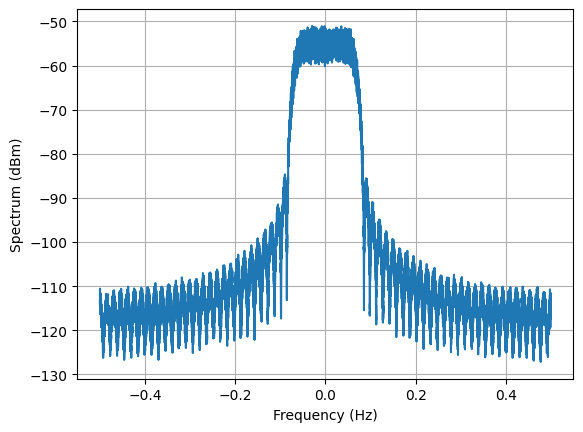

In [ ]:
fs = 1
plotSpectrum(tSignal, fs)